In [770]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

First we need to define the mesh

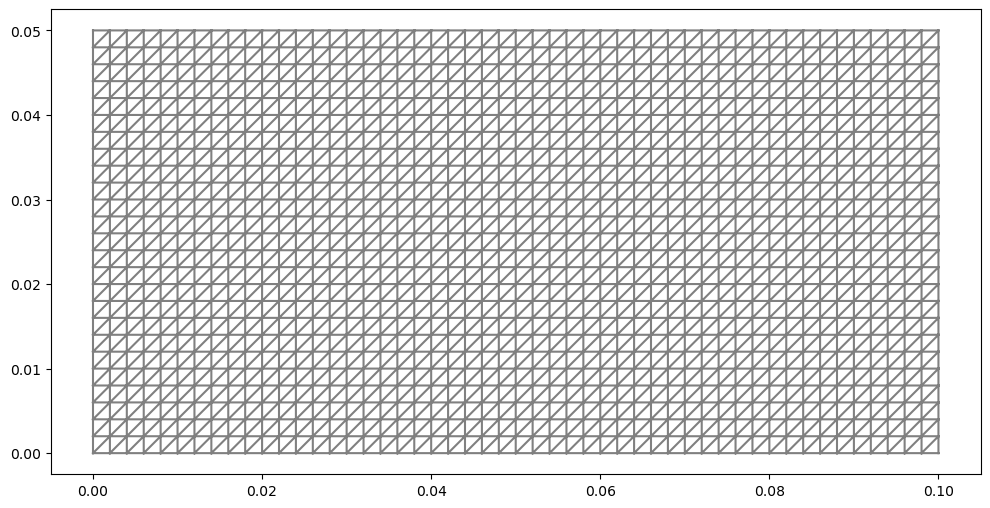

In [771]:
lx, ly = 0.1, 0.05
nx, ny = 50, 25

mesh = RectangleMesh(Point(0,0),Point(lx,ly), nx, ny)
plot(mesh)

In [772]:
rho = 8.02*10**3 #kg/m3
k = 16.26 #W/mC
cp = 502 #J/kgC
alfa = k/(cp*rho)
alfa

4.038708010849371e-06

 Function Space and Test Functions can be defined

In [773]:
V = FunctionSpace(mesh, 'P',1)
u = TrialFunction(V)
v = TestFunction(V)

Now we can define boundaries

In [774]:
# Define Dirichlet boundary (x = 0)
def left(x):
    return x[0] < DOLFIN_EPS 

# Define Dirichlet boundary (x = 1)
def right(x):
    return x[0] > lx - DOLFIN_EPS 

# Define Dirichlet boundary (y = 0)
def bottom(x):
    return x[1] < DOLFIN_EPS 

# Define Dirichlet boundary (y = 1)
def top(x):
    return x[1] > ly - DOLFIN_EPS 


In [775]:
T_L = 1000.00 # C Constant 1000C supply from left
T_R = 500.00 # C Constant 500C right
T_U = 1000.00 # C Top side temperature
T_B = 500.00 # C Bottom side temp
T_0 = 30.00 # C Ambient Temperature

In [776]:
bc_left   = DirichletBC(V, T_L, left)
bc_right  = DirichletBC(V, T_R, right)
bc_top    = DirichletBC(V, T_U, top)
bc_bottom = DirichletBC(V, T_B, bottom)

In [777]:
bcs = [bc_left, bc_right, bc_top, bc_bottom ]

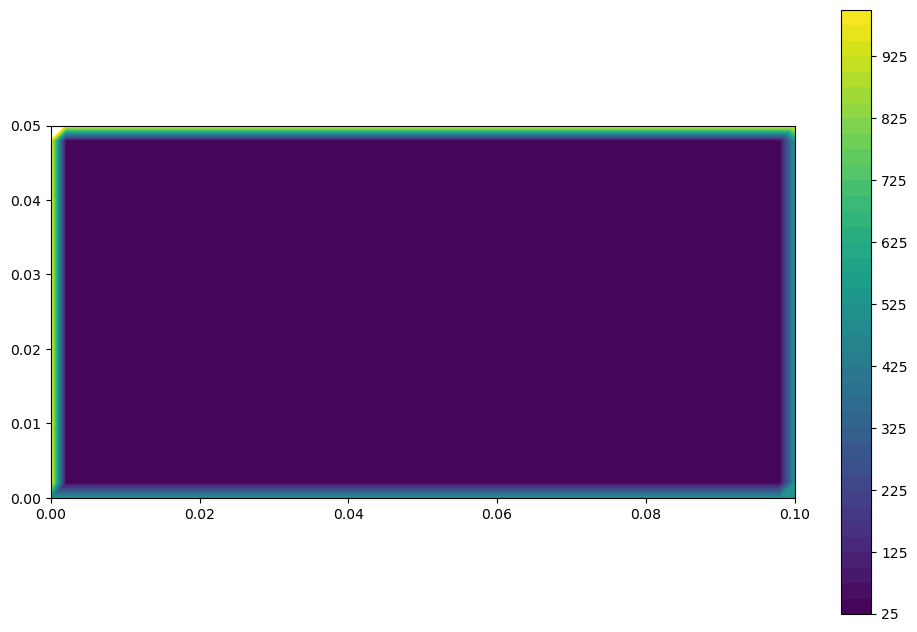

In [778]:
u_i = Constant(T_0)
u_0 = project(u_i, V)
for bc in bcs:
    bc.apply(u_0.vector())

p0 = plot(u_0)
plt.colorbar(p0,cmap='jet',)


## Weak Formulation
$\frac{\partial u}{\partial t} = \alpha  \nabla^2u+f$

New PDE i going to be like;

$\frac{\partial u}{\partial t}^{n+1} =\alpha  \nabla^2 u^{n+1} +f^{n+1}$

The left handside can be approximated as;

$\frac{u^{n+1}-u^{n}}{\Delta t} = \alpha \nabla^2 u^{n+1} +f^{n+1}$

Rearranging gives;

$u^{n+1}- \alpha \nabla^2 u^{n+1} \Delta t = f^{n+1} \Delta t + u^{n} $

Integration over the domain, multiplication of test function $v$ and integration by parts gives;

$\int u^{n+1}v + \alpha \nabla u^{n+1} \nabla v \Delta t dx = \int f^{n+1} \Delta t v + u^{n} v dx$

In [779]:
final_time = 15 # seconds
time_step = 100
dt = final_time / time_step
t = 0

In [780]:
f = Constant(0)
alfa = Constant(alfa)
a =  u * v * dx + alfa * dt * inner(grad(u), grad(v))* dx
L = (u_0 + f * dt) * v * dx

In [781]:
u = Function(V)
while t <= final_time :

    t += dt
    solve(a == L, u, bcs)
    u_0.assign(u)
    # print(t)
    

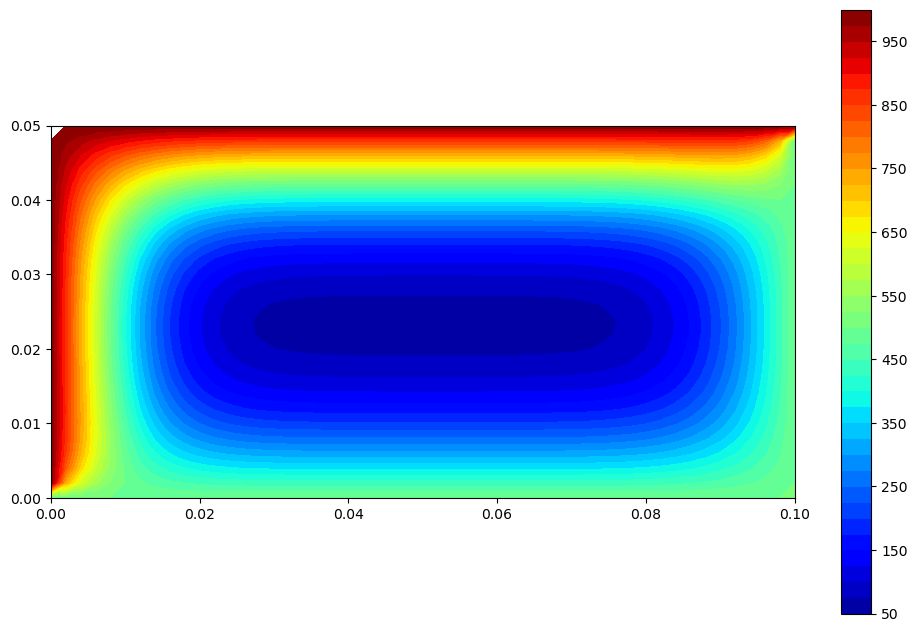

In [782]:
p = plot(u, cmap='jet', vmin=T_0, vmax=T_U)
plt.colorbar(p)